In [2]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
import numpy as np
import pydot
import networkx as nx
from PIL import Image
import psutil
import IPython.display

In [3]:
def draw(G):
    nx.drawing.nx_pydot.write_dot(G,'power.dot')
    (graph,) = pydot.graph_from_dot_file('power.dot')
    graph.write_png('power.png')
    display(Image.open('power.png'))

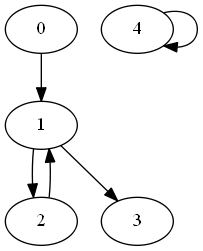

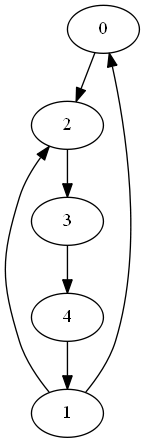

In [5]:
G1=np.array([[0,1,0,0,0],
            [0,0,1,1,0],
            [0,1,0,0,0],
            [0,0,0,0,0],
            [0,0,0,0,1]])

draw(nx.DiGraph(G1))

G2=np.array([[0,0,1,0,0],
            [1,0,1,0,0],
            [0,0,0,1,0],
            [0,0,0,0,1],
            [0,1,0,0,0]])
draw(nx.DiGraph(G2))

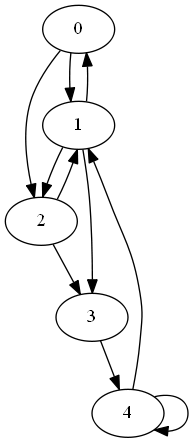

In [6]:
H=G1+G2
draw(nx.DiGraph(H))

In [7]:
def compose(G,G2,col="black"):
    graphique=nx.DiGraph()
    graphique.add_nodes_from([i for i in range(len(G))])
    H=np.zeros((len(G),len(G)))
    for i in range(len(G)):
        for j in range(len(G)):
            if G2[i][j]:
                for k in range(len(G)):
                    if G[j][k]:
                        H[i][k]=1
                        IPython.display.clear_output(wait  = True)
                        graphique.add_edge(i,k,color=col)
                        draw(graphique)
                        time.sleep(0.5)
    return H

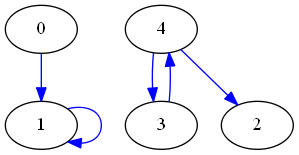

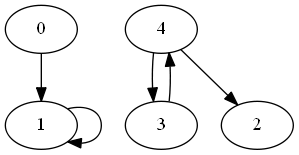

In [8]:
#G1 rond G2
H=compose(G1,G2,"blue")
draw(nx.DiGraph(H))

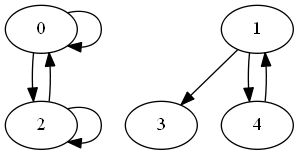

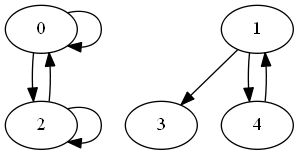

In [9]:
#G2 rond G1
#on part du graph G1 puis on fait la balscule avec G2
H=compose(G2,G1)
draw(nx.DiGraph(H))

In [10]:
def  algo_puissance(G):
    Gtr=G
    term=False
    i=2
    n=len(G)
    while (not term and i<=n):
        h=Gtr
        Gtr=(G+compose(G,Gtr))>=1
        if h.all()==Gtr.all():
            term=True
        else:
            i=i+1
    return Gtr

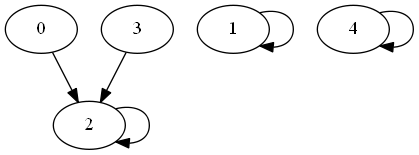

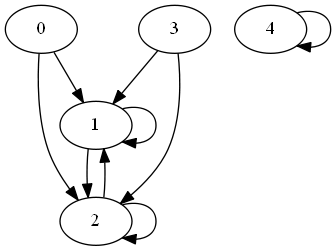

In [11]:
G=np.array([[0,1,0,0,0],
            [0,0,1,0,0],
            [0,1,0,0,0],
            [0,1,0,0,0],
            [0,0,0,0,1]])
draw(nx.DiGraph(algo_puissance(G)))


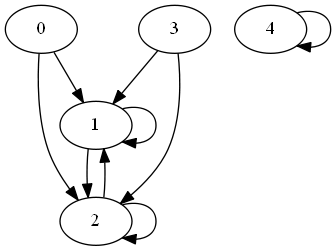

In [110]:

draw(nx.transitive_closure(nx.DiGraph(G)))


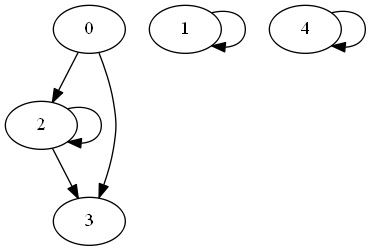

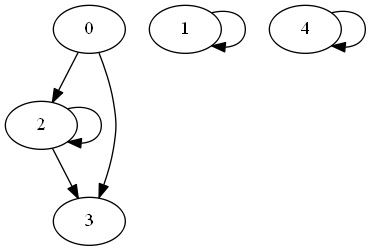

In [111]:
#quand on eleve un graph a une puissance on le compose juste avec lui même 
H=compose(G1,G1)
draw(nx.DiGraph(H))


In [12]:
"""Prend en parametre la matrice d'adjacence du graph et un parametre numerique,
0 le graph se construit 1 on construit les sous-graphe"""
def roy_warshall(G,typee=0):
    color=["blue","yellow","green","cyan","red","purple","brown","black","magenta","blue","red","green","yellow","green","brown"]
    Gtr=G>=1
    graphique=nx.DiGraph(Gtr)

    n=len(G)
    for i in range(0,n):
        for x in range(0,n):
            if Gtr[x][i]:
                y=1
                for y in range(0,n):
                    if Gtr[i][y]:
                        Gtr[x][y]=True
                        if not graphique.has_edge(i,x):
                            graphique.add_edge(x,y,color=color[i])
                        if typee==0:
                            IPython.display.clear_output(wait  = True)
                            draw(graphique)
                            time.sleep(0.5)
        if typee==1:
            pred=list(graphique.predecessors(i))
            succ=list(graphique.successors(i))
            g=nx.DiGraph()
            g.add_nodes_from(pred+succ+[i])
            for h in pred:
                g.add_edge(h,i,color=color[i])
            for h in succ:
                g.add_edge(i,h,color=color[i])
            draw(g)
                        
    return Gtr

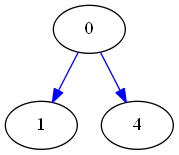

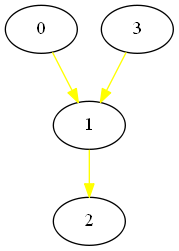

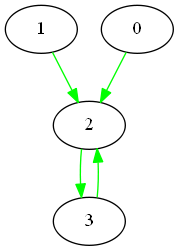

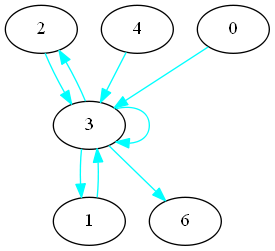

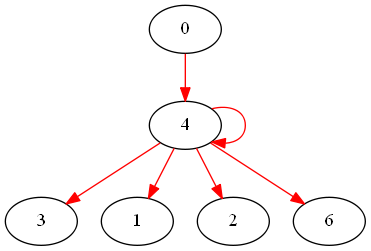

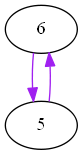

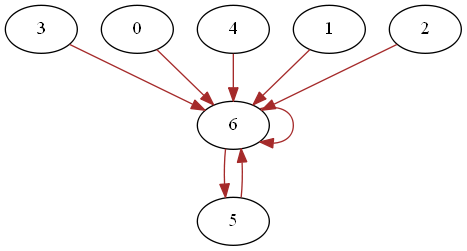

[[False  True  True  True  True  True  True]
 [False  True  True  True False  True  True]
 [False  True  True  True False  True  True]
 [False  True  True  True False  True  True]
 [False  True  True  True  True  True  True]
 [False False False False False  True  True]
 [False False False False False  True  True]]


In [8]:
T=np.array([[0,1,0,0,1,0,0],
            [0,0,1,0,0,0,0],
            [0,0,0,1,0,0,0],
            [0,1,0,0,0,0,1],
            [0,0,0,1,1,0,0],
            [0,0,0,0,0,0,1],
            [0,0,0,0,0,1,0]])

print(roy_warshall(T,1))

In [16]:
TrajanGraph=np.array([[0,1,1,1,0,1],
                     [0,0,0,0,0,0],
                     [0,0,0,0,0,0],
                     [0,1,0,0,1,1],
                     [0,0,0,0,0,0],
                     [0,0,0,0,0,0]])

In [1]:
def tarjan(G):
    graphelist=[]
    color=["blue","yellow","green","cyan","red","purple","brown"]
    arbo=nx.Graph(G)
    a=1
    c=0
    #predecesseur du sommet i 
    p=[0 for i in range(len(G))]
    #indice du dernier sommet du chemin explorer (i) exploré }
    n=[0 for i in range(len(G))]
    #nombres de sommets adjacents au sommmets i 
    d=[0 for i in range(len(G))]
    # numéro du sommet i dans l’exploration 
    nume=[0 for i in range(len(G))]
    graph=nx.Graph(G)
    for i in range(1,len(G)+1):
        #on récupere le nombre de voisins de chaque noeuds
        d[i-1]=len(graph.adj[i-1])
    k=1
    j=1
    i=a
    nume[a-1]=1
    p[a-1]=a
    compteur=1
    while n[i-1] != d[i-1] or i !=a:
        if n[i-1]==d[i-1]:
            i=p[i-1]
        else:
            n[i-1]=n[i-1]+1
            #On récupere le prochain successeur de notre noeud i 
            arbo.add_edge(j-1,list(graph.adj[i-1])[n[i-1]-1],color=color[c])
            j=list(graph.adj[i-1])[n[i-1]-1]+1
            if p[j-1]==0:
                p[j-1]=i
                i=j
                k=k+1
                nume[i-1]=k
            print("j: "+str(j))
            if j==1:
                c=c+1
                graphelist.append(arbo)
                arbo=nx.Graph(G)
    graphelist.append(arbo)
            #IPython.display.clear_output(wait  = True)
            #draw(arbo)
            #time.sleep(0.5)
            
    print(nume)
    print(p)
    arbo=nx.Graph()
    for i in range(len(nume)):
        arbo.add_node(i,position=nume[i])
        arbo.add_edge(p[i]-1,i)
    draw(arbo)
    for item in graphelist:
        draw(item)
        
    return k

In [18]:
def foulkes(G):
    NC=[i for i in range(len(G))]
    CFC=[]
    for i in range(len(G)):
        if i in NC:
            cfc=[i]
            NC.remove(i)
        if G[i][i]==1:
            for j in range(i+1,len(G)+1):
                if j in NC:
                    if G[i][j]==1 and G[j][i]==1:
                            cfc.append(j)
                            NC.remove(j)
        if cfc not in CFC:
            CFC.append(cfc)
    return CFC

j: 2
j: 1
j: 4
j: 1
j: 2
j: 5
j: 4
j: 6
j: 1
j: 4
j: 3
j: 1
j: 4
j: 6
[1, 2, 6, 3, 4, 5]
[1, 1, 1, 2, 4, 4]


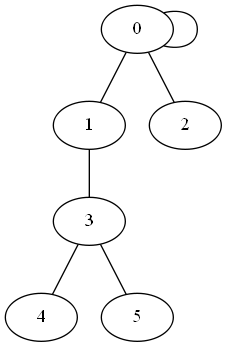

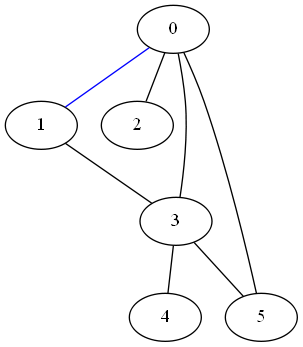

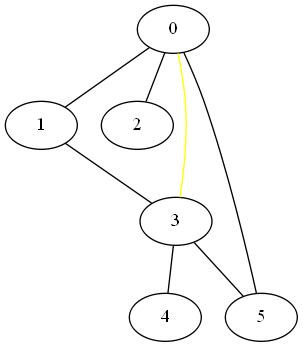

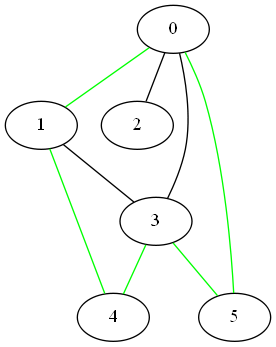

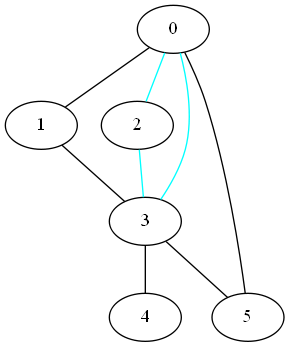

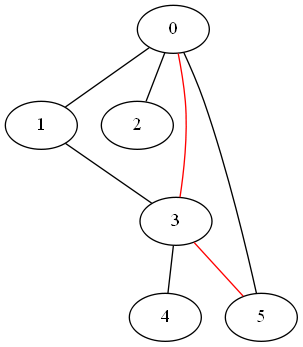

6


In [19]:
print(tarjan(TrajanGraph))

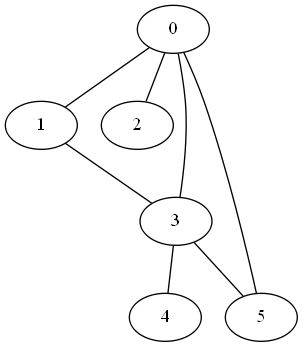

In [7]:
S = [nx.Graph(TrajanGraph).subgraph(c).copy() for c in nx.connected_components(nx.Graph(TrajanGraph))]
nx.drawing.nx_pydot.write_dot(S[0],'roy_warshall.dot')
(graphe,) = pydot.graph_from_dot_file('roy_warshall.dot')
graphe.write_png('roy_warshall.png')
test=Image.open('roy_warshall.png')
display(test)

In [66]:
for i in nx.strongly_connected_components(nx.DiGraph(Foulkes)):
    print(i)

{11, 12, 13}
{0}
{1}
{2, 3, 4}
{8, 7}
{9, 10, 5, 6}


In [67]:
print(foulkes(nx.DiGraph(Foulkes)))

TypeError: 'numpy.ndarray' object is not callable

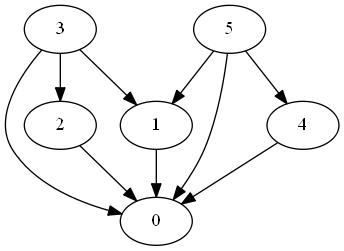

In [22]:
S = [nx.DiGraph(Foulkes).subgraph(c).copy() for c in nx.weakly_connected_components(nx.DiGraph(Foulkes))]
draw(nx.condensation(nx.DiGraph(Foulkes)))


In [64]:
Foulkes=np.array([[0,0,0,0,0,0,0,0,0,0,0,1,1,1],
                 [0,0,0,0,0,0,0,0,0,0,0,1,1,1],
                 [1,1,1,1,1,0,0,0,0,0,0,1,1,1],
                 [1,1,1,1,1,0,0,0,0,0,0,1,1,1],
                 [1,1,1,1,1,0,0,0,0,0,0,1,1,1],
                 [1,0,0,0,0,1,1,1,1,1,1,1,1,1],
                 [1,0,0,0,0,1,1,1,1,1,1,1,1,1],
                 [0,0,0,0,0,0,0,1,1,0,0,1,1,1],
                 [0,0,0,0,0,0,0,1,1,0,0,1,1,1],
                 [1,0,0,0,0,1,1,1,1,1,1,1,1,1],
                 [1,0,0,0,0,1,1,1,1,1,1,1,1,1],
                 [0,0,0,0,0,0,0,0,0,0,0,1,1,1],
                 [0,0,0,0,0,0,0,0,0,0,0,1,1,1],
                 [0,0,0,0,0,0,0,0,0,0,0,1,1,1]])

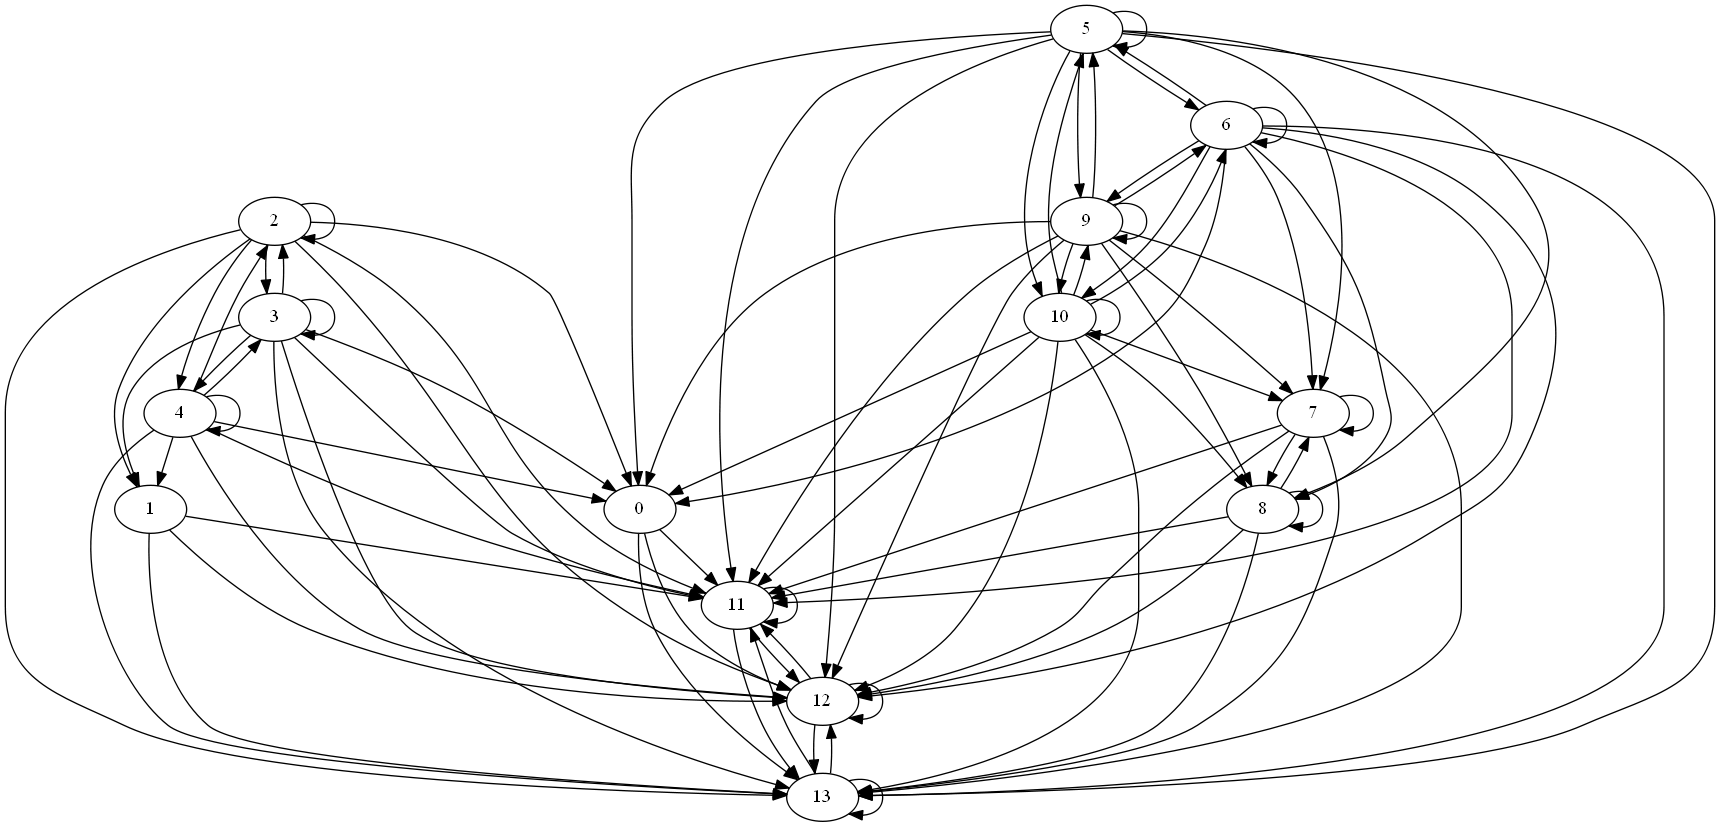

In [60]:
draw(nx.DiGraph(Foulkes))

In [59]:
draw(Foulkes(Foulkes))

KeyboardInterrupt: 

In [55]:
test=np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], 
[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
[1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0], 
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], 
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

AttributeError: 'numpy.ndarray' object has no attribute 'predecessors'

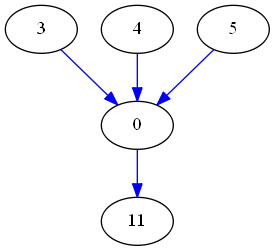

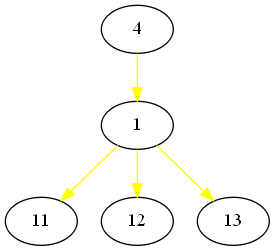

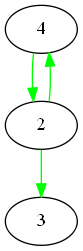

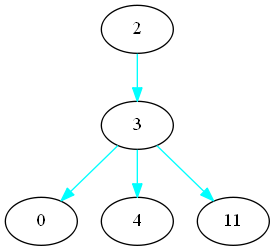

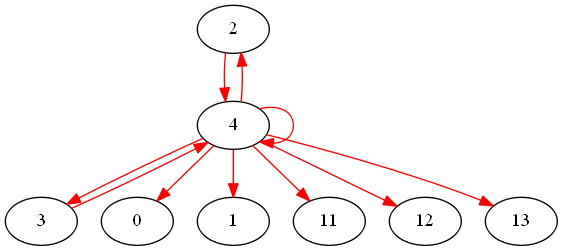

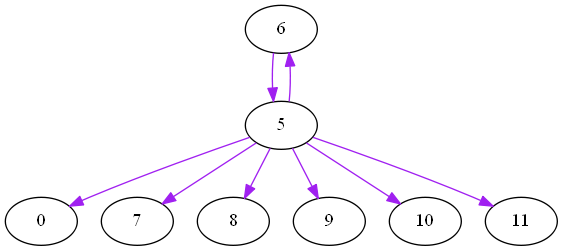

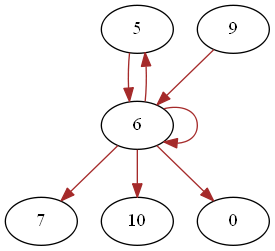

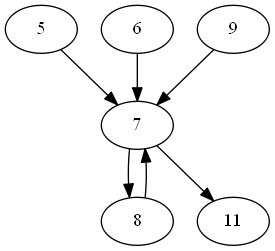

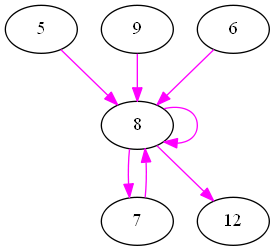

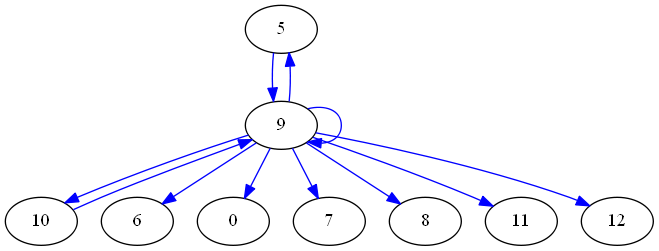

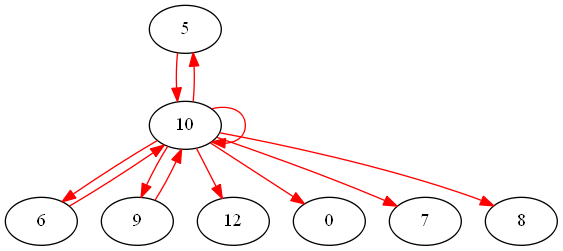

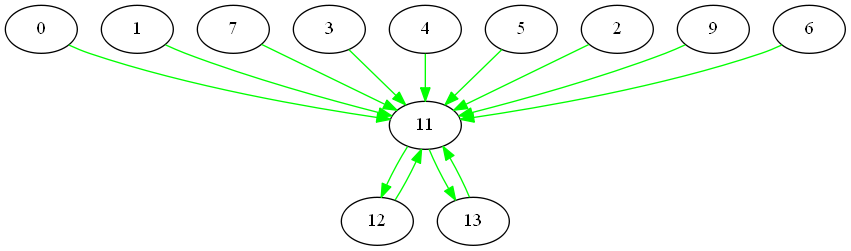

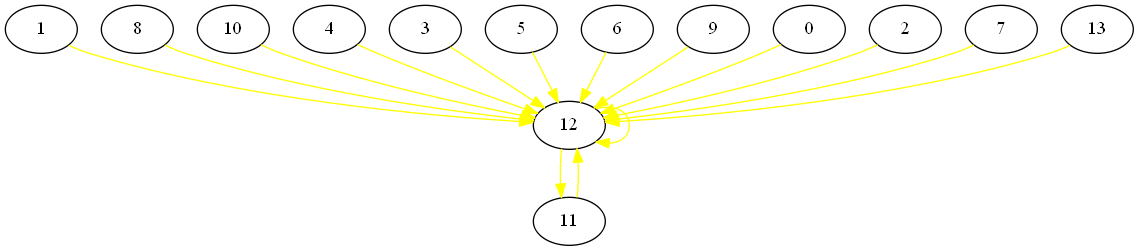

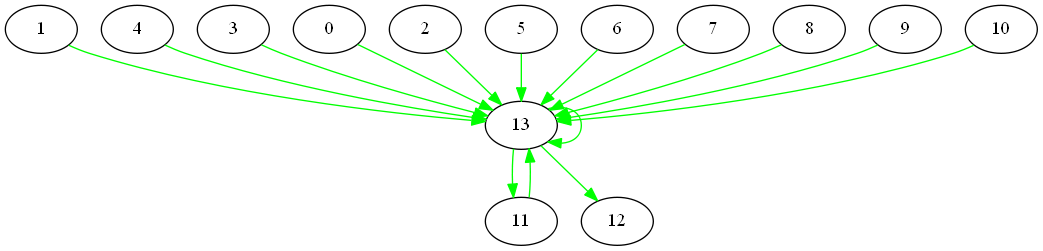

[[False False False False False False False False False False False  True
   True  True]
 [False False False False False False False False False False False  True
   True  True]
 [ True  True  True  True  True False False False False False False  True
   True  True]
 [ True  True  True  True  True False False False False False False  True
   True  True]
 [ True  True  True  True  True False False False False False False  True
   True  True]
 [ True False False False False  True  True  True  True  True  True  True
   True  True]
 [ True False False False False  True  True  True  True  True  True  True
   True  True]
 [False False False False False False False  True  True False False  True
   True  True]
 [False False False False False False False  True  True False False  True
   True  True]
 [ True False False False False  True  True  True  True  True  True  True
   True  True]
 [ True False False False False  True  True  True  True  True  True  True
   True  True]
 [False False False F

In [58]:
print(roy_warshall(test,1))


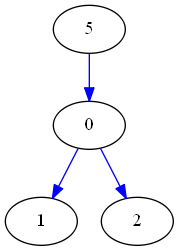

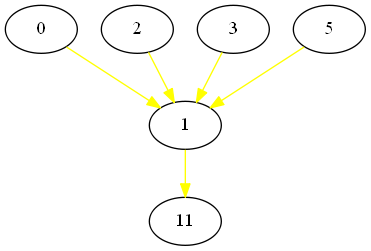

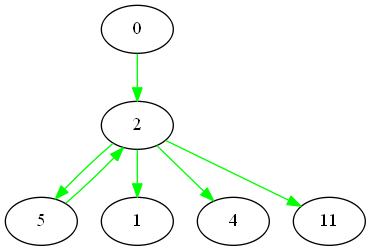

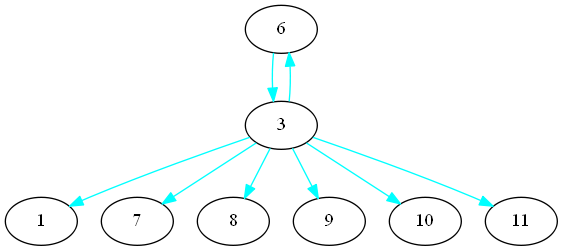

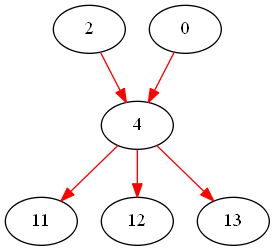

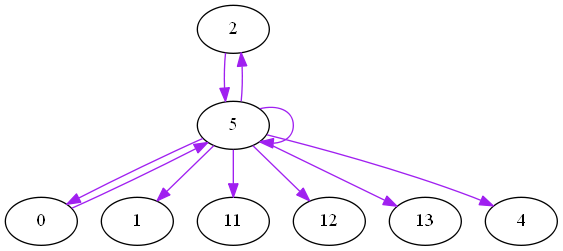

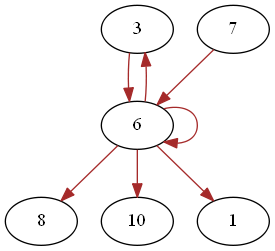

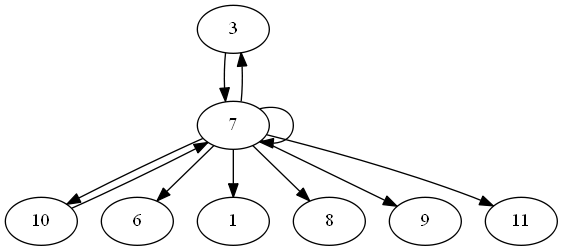

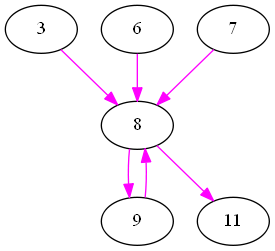

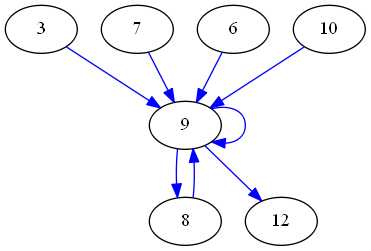

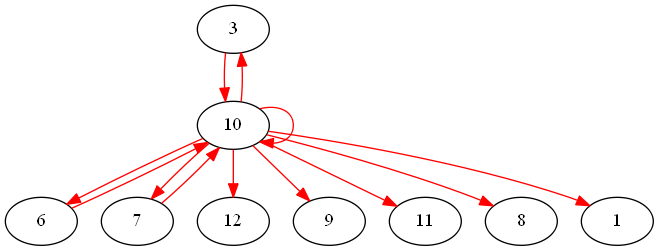

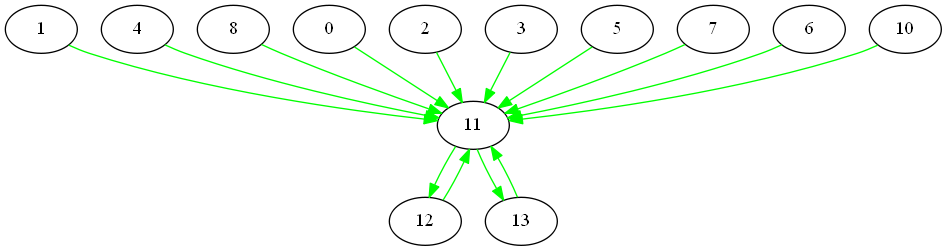

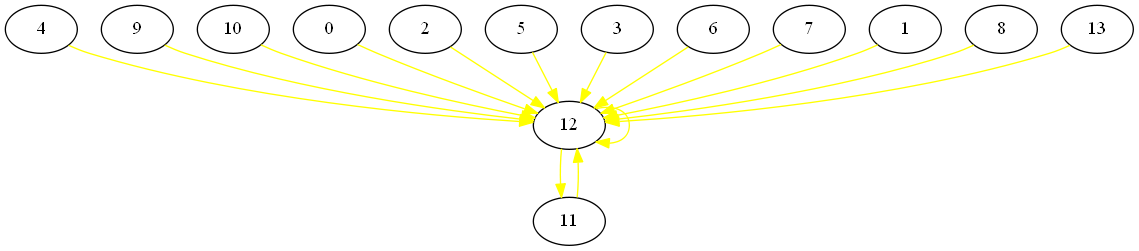

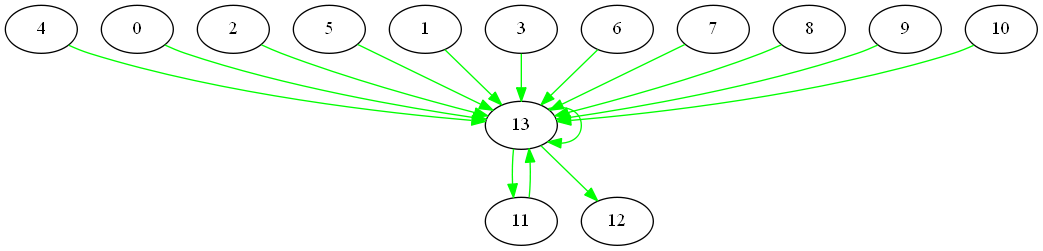

[[ True  True  True False  True  True False False False False False  True
   True  True]
 [False False False False False False False False False False False  True
   True  True]
 [ True  True  True False  True  True False False False False False  True
   True  True]
 [False  True False  True False False  True  True  True  True  True  True
   True  True]
 [False False False False False False False False False False False  True
   True  True]
 [ True  True  True False  True  True False False False False False  True
   True  True]
 [False  True False  True False False  True  True  True  True  True  True
   True  True]
 [False  True False  True False False  True  True  True  True  True  True
   True  True]
 [False False False False False False False False  True  True False  True
   True  True]
 [False False False False False False False False  True  True False  True
   True  True]
 [False  True False  True False False  True  True  True  True  True  True
   True  True]
 [False False False F

In [49]:
print(roy_warshall(np.array(adj),1))